# Interstate 94 Highway
Hourly Interstate 94 Westbound traffic volume for MN DoT ATR station 301, roughly midway between Minneapolis and St Paul, MN.  
Hourly weather features and holidays included for impacts on traffic volume.

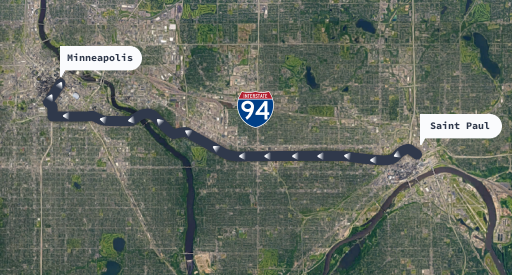

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
interstate_traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
interstate_traffic.info()
interstate_traffic

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
48199,NaN,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,NaN,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,NaN,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,NaN,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450


<bound method NDFrame.describe of 0        5545
1        4516
2        4767
3        5026
4        4918
         ... 
48199    3543
48200    2781
48201    2159
48202    1450
48203     954
Name: traffic_volume, Length: 48204, dtype: int64>

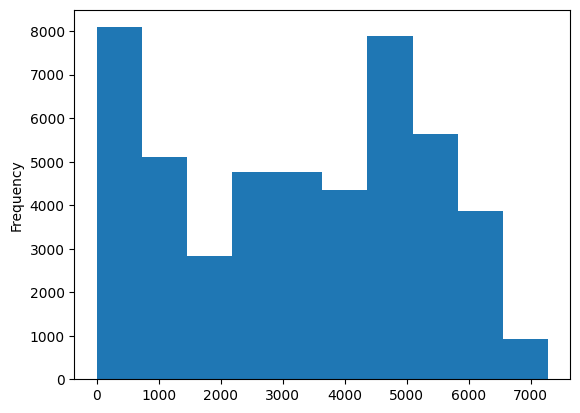

In [3]:
interstate_traffic['traffic_volume'].plot(kind='hist')
interstate_traffic['traffic_volume'].describe

#### Does traffic volume vary by time of day?
plot traffic volume per hour of day on average

<Axes: xlabel='hr_of_day'>

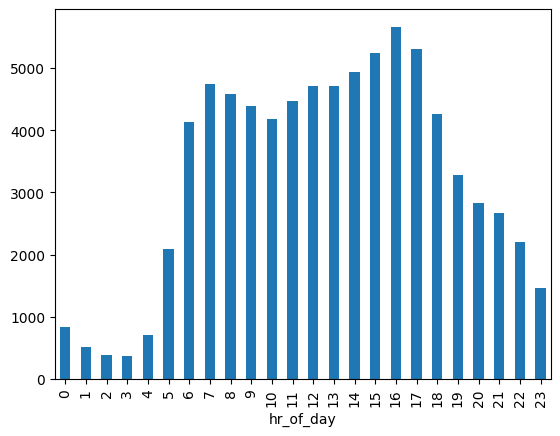

In [4]:
#change 'date_time' from object to timestamp to access 'hour' using '.dt' 
interstate_traffic['date_time'] = pd.to_datetime(interstate_traffic['date_time'])

#plot the average traffic volume per hour of day
interstate_traffic.groupby([interstate_traffic['date_time'].dt.hour])['traffic_volume'].mean().plot(kind='bar', xlabel='hr_of_day')

In [5]:
interstate_traffic['time'] = np.where((interstate_traffic['date_time'].dt.hour).between(7, 19, inclusive='left'), 'day', 'night')
interstate_traffic

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,time
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,day
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,day
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,day
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,day
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,day
...,...,...,...,...,...,...,...,...,...,...
48199,NaN,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543,night
48200,NaN,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781,night
48201,NaN,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159,night
48202,NaN,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450,night


In [6]:
interstate_traffic[interstate_traffic['time'] == 'day']['traffic_volume'].describe

<bound method NDFrame.describe of 0        5545
1        4516
2        4767
3        5026
4        4918
         ... 
48194    4302
48195    4302
48196    4283
48197    4132
48198    3947
Name: traffic_volume, Length: 23877, dtype: int64>

In [7]:
interstate_traffic[interstate_traffic['time'] == 'night']['traffic_volume'].describe

<bound method NDFrame.describe of 10       3539
11       2784
12       2361
13       1529
14        963
         ... 
48199    3543
48200    2781
48201    2159
48202    1450
48203     954
Name: traffic_volume, Length: 24327, dtype: int64>

In [8]:
# traffic volume during the day
# interstate_traffic[interstate_traffic['time'] == 'day']['traffic_volume'].plot(kind='hist')

In [9]:
# traffic volume during the night
# interstate_traffic[interstate_traffic['time'] == 'night']['traffic_volume'].plot(kind='hist')

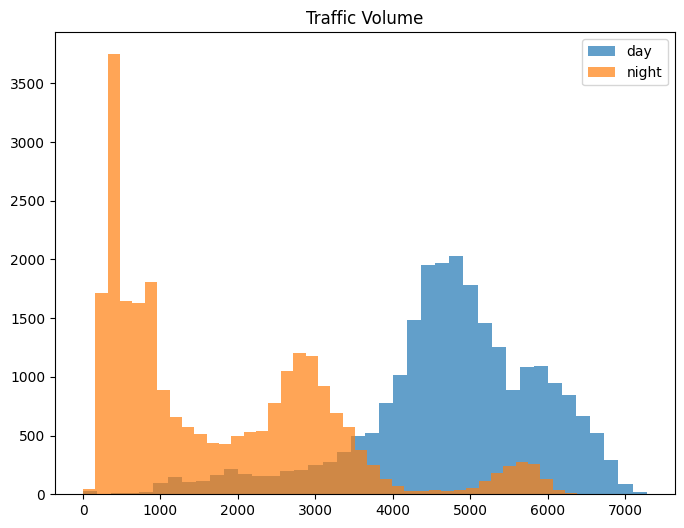

In [10]:
plt.figure(figsize=(8, 6))
plt.title('Traffic Volume')

plt.hist(interstate_traffic[interstate_traffic['time'] == 'day']['traffic_volume'], bins=40, alpha=0.7, label='day')
plt.hist(interstate_traffic[interstate_traffic['time'] == 'night']['traffic_volume'], bins=40, alpha=0.7, label='night')
plt.legend(loc='upper right')

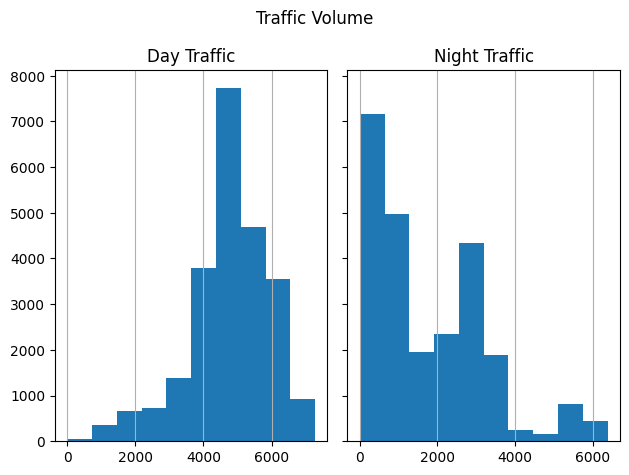

In [11]:
fig, (ax0, ax1) = plt.subplots(1, 2, sharey=True)

fig.suptitle('Traffic Volume')

ax0.hist(interstate_traffic[interstate_traffic['time'] == 'day']['traffic_volume'])
ax0.set_title('Day Traffic')
ax0.grid(axis='x')

ax1.hist(interstate_traffic[interstate_traffic['time'] == 'night']['traffic_volume'])
ax1.set_title('Night Traffic')
ax1.grid(axis='x')

fig.tight_layout()

#### Does traffic volume vary by month?
#### Is it because of seasons?

Text(0.5, 0, 'month')

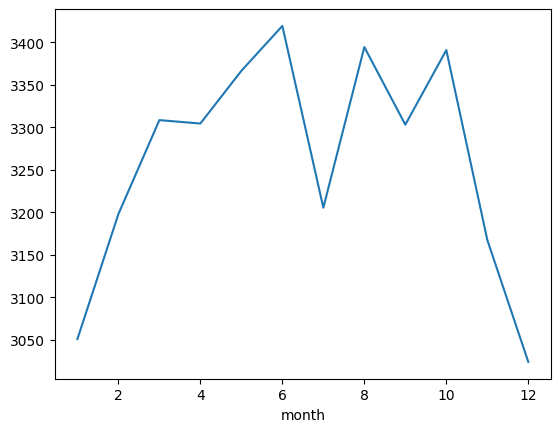

In [12]:
interstate_traffic.groupby(interstate_traffic['date_time'].dt.month)['traffic_volume'].mean().plot(kind='line')
plt.xlabel('month')

#### Does traffic volume vary by day of the week? 
##### Any interesting patterns across weekdays/weekends

Text(0.5, 0, 'day of week')

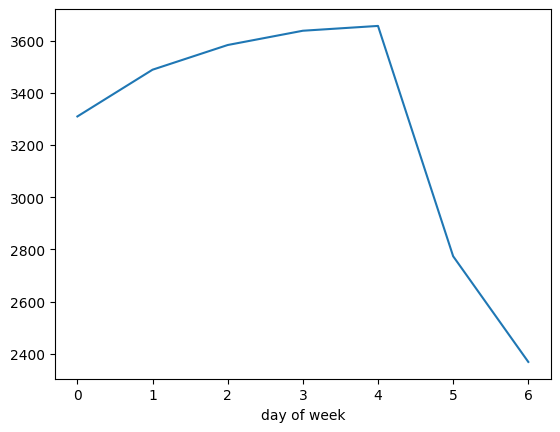

In [13]:
interstate_traffic.groupby(interstate_traffic['date_time'].dt.dayofweek)['traffic_volume'].mean().plot(kind='line')
plt.xlabel('day of week')

In [14]:
interstate_traffic['dayofweek'] = np.where((interstate_traffic['date_time'].dt.dayofweek).between(0, 4, inclusive='both'), 'weekday', 'weekend')
interstate_traffic

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,time,dayofweek
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,day,weekday
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,day,weekday
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,day,weekday
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,day,weekday
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,day,weekday
...,...,...,...,...,...,...,...,...,...,...,...
48199,NaN,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543,night,weekend
48200,NaN,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781,night,weekend
48201,NaN,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159,night,weekend
48202,NaN,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450,night,weekend


#### What are the peak hours for traffic?
07:00 and 16:00 on weekdays, 12:00 through to 16:00 on weekends

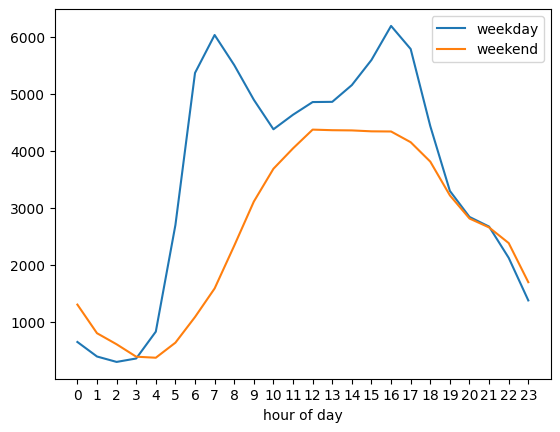

In [15]:
interstate_traffic[interstate_traffic['dayofweek'] == 'weekday'].groupby(interstate_traffic['date_time'].dt.hour)['traffic_volume'].mean().plot(kind='line', label='weekday')
interstate_traffic[interstate_traffic['dayofweek'] == 'weekend'].groupby(interstate_traffic['date_time'].dt.hour)['traffic_volume'].mean().plot(kind='line', label='weekend')

plt.legend()
plt.xticks(np.arange(0, 24))
plt.xlabel('hour of day')
plt.show()

In [16]:
# float: temp, rain_1h, snow_1h, clouds_all
# object: weather_main, weather_description

interstate_traffic.loc[:, ['temp', 'rain_1h', 'snow_1h', 'clouds_all']].corrwith(interstate_traffic['traffic_volume'])

temp          0.130299
rain_1h       0.004714
snow_1h       0.000733
clouds_all    0.067054
dtype: float64

<Axes: ylabel='weather_main'>

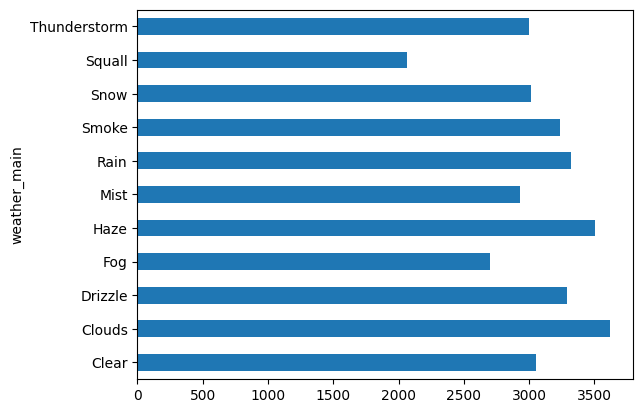

In [17]:
interstate_traffic.groupby('weather_main')['traffic_volume'].mean().plot(kind='barh')

<Axes: ylabel='weather_description'>

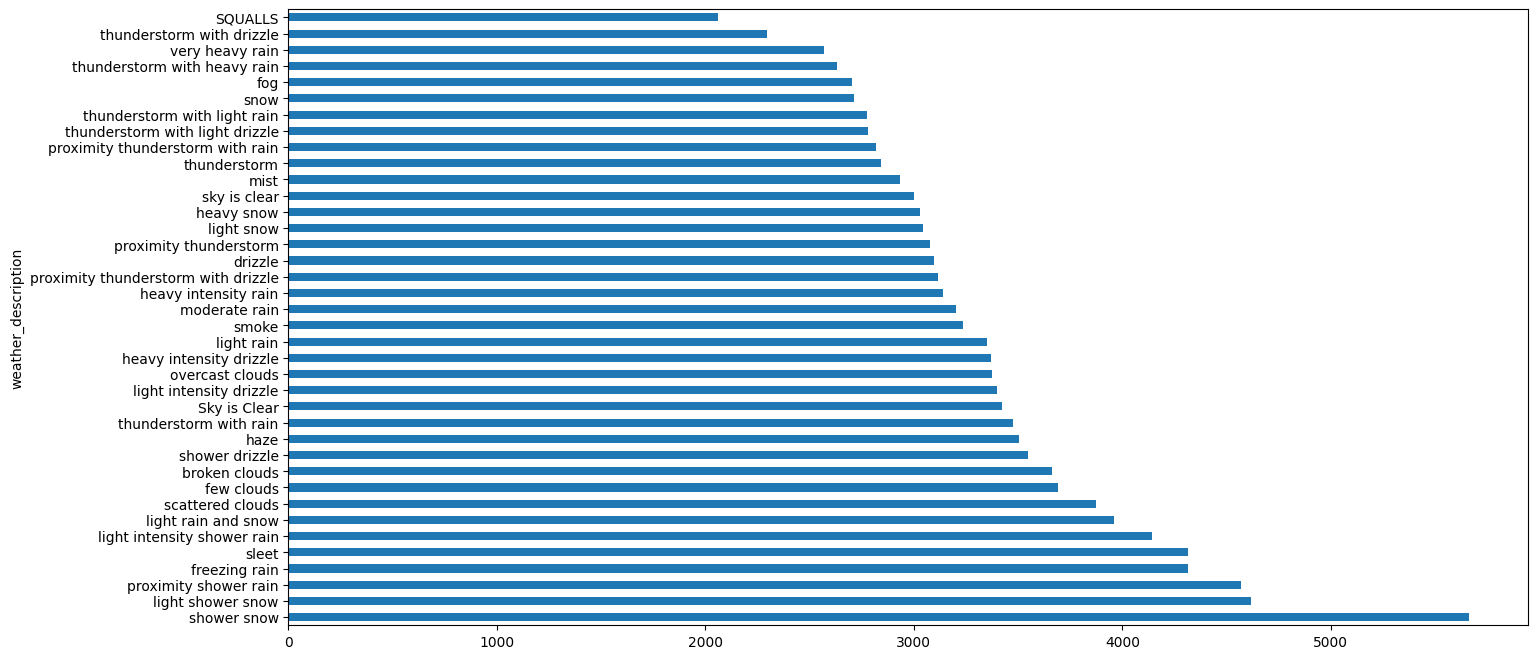

In [18]:
interstate_traffic.groupby('weather_description')['traffic_volume'].mean().sort_values(ascending=False).plot(kind='barh', figsize=(16, 8))

# VERDICT
#### The more adverse the weather the less the traffic